<h1>Biblioteca</h1>

In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics



<h1>Funções Coringas</h1>

In [47]:
##Exportação do dataframe em Python
##df_excel=df
##df_excel.to_excel (r'C:\Users\Gabriel\Desktop\Mestrado\export_dataframe.xlsx', index = False, header=True)

##Leitura Excel
#df = pd.read_excel(r'C:\Users\Gabriel\Desktop\Mestrado\Testes\TESTE.xlsx')

<h1>Dataframe não Processado</h1>

In [48]:
j=pd.read_json('https://jeap.rio.rj.gov.br/dadosAbertosAPI/v2/transporte/veiculos/onibus2')
j

,ordem,linha,latitude,longitude,velocidade,dataHora
0,C47972,2112,-22.95243,-43.34823,0,07-11-2022 02:19:58
1,B63034,665,-22.79245,-43.29434,0,07-11-2022 07:10:32
2,A63516,104,-22.86765,-43.25865,0,07-11-2022 07:15:08
3,B32502,615,-22.91778,-43.68427,0,07-11-2022 08:07:17
4,D87320,822,-22.91811,-43.60764,0,07-11-2022 08:27:00
...,...,...,...,...,...,...
3540,A71623,539,-22.98901,-43.24957,0,07-11-2022 15:02:03
3541,B11651,651,-22.90176,-43.28065,0,07-11-2022 15:02:03
3542,A71520,409,-22.93129,-43.23437,0,07-11-2022 15:02:04
3543,A71604,416,-22.94780,-43.18214,0,07-11-2022 15:02:04


<h1>Pré-Processamento</h1>

In [49]:
## Dataframe Original
json = pd.read_json('https://jeap.rio.rj.gov.br/dadosAbertosAPI/v2/transporte/veiculos/onibus2')

#Removendo campos em branco
nan_value = float("NaN")
json.replace("", nan_value, inplace=True)
json.dropna(subset = ["linha"], inplace=True)
json['codigoempresa']=json['ordem'].str.slice(1,4)

#Novo Dataframe

ordem=json['ordem']
linha=json['linha']

empresa=[        "Transportes Paranapuan S/A" if s>="100" and s<"105" else
                  "Viação Penha Rio Ltda" if s>="105" and s<"115" else
                  "Viação Vila Real S/A" if s>="115" and s<"120" else
                  "Expresso Recreio Ltda" if s>="120" and s<"125" else
                  "Viação Normandy To Triângulo Ltda" if s>="125" and s<"130" else
                  "Transportes Barra Ltda" if s>="130" and s<"170" else 
                  "Auto Viação Palmares Ltda" if s>="170" and s<"255" else
                  "Roviária Âncora Matias" if s>="225" and s<"270" else
                  "Caprichosa Auto Ônibus Ltda" if s>="270" and s<"275" else
                  "Transportes Vila Isabel S/A " if s>="275" and s<"285" else
                  "Viação Ideal S/A" if s>="285" and s<"290" else
                  "Empresa Braso Lisboa" if s>="290" and s<"300" else 
                  "Transportes Futuro Ltda" if s>="300" and s<"310" else 
                  "Viação VG Eireli ME" if s>="310" and s<"325" else 
                  "Viação Pavuenense S/A" if s>="325" and s<"410" else 
                  "Real Auto Ônibus Ltda" if s>="410" and s<"425" else 
                  "Viação Acari S/A" if s>="425" and s<"445" else 
                  "Auto Viação Três Amigos Ltda" if s>="445" and s<"475" else
                  "Viação Redentor Ltda" if s>="475" and s<"480" else
                  "Auto Viação Alpha S/A " if s>="480" and s<"500" else
                  "Tijuquinha - Auto Viação Tijuca S/A" if s>="500" and s<"515" else
                  "Viação Novacap S/A" if s>="515" and s<"535" else
                  "Transportes Campo Grande Ltda" if s>="535" and s<"580" else
                  "Viação Nossa Senhora de Lourdes Ltda" if s>="580" and s<"630" else
                  "Gire Transportes Ltda" if s>="630" and s<"710" else
                  "Viação Verdun S/A" if s>="710" and s<"715" else
                  "Viação Nossa Senhora das Graças Ltda" if s>="715" and s<"720" else
                  "Transurb S/A" if s>="720" and s<"860" else
                  "Auto Viação Jabour Ltda" if s>="860" and s<"870" else
                  "Expresso Pégasso Ltda" if s>="870" and s<"999" 
                   else "BRT Rio S.A"  for s in json['codigoempresa']
] 

codigoempresa=json['ordem'].str.slice(1,4)
latitude=json['latitude']
longitude=json['longitude']
velocidade=json['velocidade']
dataHora=json['dataHora'].astype('datetime64[ns]')

# Criando um Dataframe Parcial
df2= pd.DataFrame(list(zip(ordem,linha,empresa,latitude,longitude,velocidade,dataHora)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','dataHora'])

#Ajuste de Fuso Horário através do Pandas
DataHoraOriginalChange=df2['dataHora']
df2['dataHoraBrasil']=pd.to_datetime(DataHoraOriginalChange, unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca')


#visualização Parcial do Dataframe
df2



,ordem,linha,empresa,latitude,longitude,velocidade,dataHora,dataHoraBrasil
0,C47972,2112,Viação Redentor Ltda,-22.95243,-43.34823,0,2022-07-11 02:19:58,2022-07-10 23:19:58-03:00
1,B63034,665,Gire Transportes Ltda,-22.79245,-43.29434,0,2022-07-11 07:10:32,2022-07-11 04:10:32-03:00
2,A63516,104,Gire Transportes Ltda,-22.86765,-43.25865,0,2022-07-11 07:15:08,2022-07-11 04:15:08-03:00
3,B32502,615,Viação Pavuenense S/A,-22.91778,-43.68427,0,2022-07-11 08:07:17,2022-07-11 05:07:17-03:00
4,D87320,822,Expresso Pégasso Ltda,-22.91811,-43.60764,0,2022-07-11 08:27:00,2022-07-11 05:27:00-03:00
...,...,...,...,...,...,...,...,...
3534,A71623,539,Viação Nossa Senhora das Graças Ltda,-22.98901,-43.24957,0,2022-07-11 15:02:03,2022-07-11 12:02:03-03:00
3535,B11651,651,Viação Vila Real S/A,-22.90176,-43.28065,0,2022-07-11 15:02:03,2022-07-11 12:02:03-03:00
3536,A71520,409,Viação Nossa Senhora das Graças Ltda,-22.93129,-43.23437,0,2022-07-11 15:02:04,2022-07-11 12:02:04-03:00
3537,A71604,416,Viação Nossa Senhora das Graças Ltda,-22.94780,-43.18214,0,2022-07-11 15:02:04,2022-07-11 12:02:04-03:00


In [50]:
#Dataframe Final 

ordemfinal=df2['ordem']
linhafinal=df2['linha']
empresafinal=df2['empresa']
latitudefinal=df2['latitude']
longitudefinal=df2['longitude']
velocidadefinal=df2['velocidade']

#Data Padrão Brasileiro
data=df2['dataHoraBrasil'].astype("string")
x=data.str.slice(0,10)
final=x.astype('datetime64[ns]')
data2=final.dt.strftime('%d/%m/%Y')

#Hora
hora=df2['dataHoraBrasil'].astype("string")
horafinal=hora.str.slice(11,19)

# Criando um Dataframe Final
dfparcial= pd.DataFrame(list(zip(ordemfinal,linhafinal,empresafinal,latitudefinal,longitudefinal,velocidadefinal,horafinal,data2)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','horario','data'])
dfFinal=dfparcial.drop_duplicates(subset=['latitude','longitude'])

dfFinal


,ordem,linha,empresa,latitude,longitude,velocidade,horario,data
0,C47972,2112,Viação Redentor Ltda,-22.95243,-43.34823,0,23:19:58,10/07/2022
1,B63034,665,Gire Transportes Ltda,-22.79245,-43.29434,0,04:10:32,11/07/2022
2,A63516,104,Gire Transportes Ltda,-22.86765,-43.25865,0,04:15:08,11/07/2022
3,B32502,615,Viação Pavuenense S/A,-22.91778,-43.68427,0,05:07:17,11/07/2022
4,D87320,822,Expresso Pégasso Ltda,-22.91811,-43.60764,0,05:27:00,11/07/2022
...,...,...,...,...,...,...,...,...
3534,A71623,539,Viação Nossa Senhora das Graças Ltda,-22.98901,-43.24957,0,12:02:03,11/07/2022
3535,B11651,651,Viação Vila Real S/A,-22.90176,-43.28065,0,12:02:03,11/07/2022
3536,A71520,409,Viação Nossa Senhora das Graças Ltda,-22.93129,-43.23437,0,12:02:04,11/07/2022
3537,A71604,416,Viação Nossa Senhora das Graças Ltda,-22.94780,-43.18214,0,12:02:04,11/07/2022


In [51]:
#Informação referente ao tipo da variavel
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3538 entries, 0 to 3538
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ordem       3538 non-null   object 
 1   linha       3538 non-null   object 
 2   empresa     3538 non-null   object 
 3   latitude    3538 non-null   float64
 4   longitude   3538 non-null   float64
 5   velocidade  3538 non-null   int64  
 6   horario     3538 non-null   object 
 7   data        3538 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 248.8+ KB


In [52]:
#Lista com as linhas de ônibus não duplicadas

dfFinal['linha'].unique()


array(['2112', '665', '104', '615', '822', '868', '771', '298', '766',
       '100', '461', '390', '804', '895', '685', '553', '472', '2336',
       '711', '905', '416', '770', 'LECD44', '803', '795', '315', '2110',
       '893', '2303', '335', '790', 'SP805', '885', '342', '2114', '210',
       '483', '292', '2345', '687', '565', '2339', '821', '731', '327',
       'SV394', '863', '476', '2111', '550', '2335', '2342', '919', '613',
       '555', '622', '300', '558', '892', '600', '810', '745', '862',
       'SP485', '324', '793', '583', '601', '362', '393', '692', '812',
       '906', '774', '112', '606', '629', '110', '2343', '378', '463',
       '805', '309', '329', '712', '361', '2310', '688', '384', 'SV777',
       '639', '539', '696', '2308', '783', '2804', '2337', '721', '897',
       '870', '474', 'LECD38', '399', '498', '460', '2307', '608', '940',
       '842', '878', '220', '275', '848', '607', '910', '866', '802',
       '326', '835', '007', '846', 'SV774', '2383', '538', '

<h1>Persistindo dados no MYSQL Server</h1>

In [57]:
#instalando a lib pip install sqlalchemy  

dfFinal


,ordem,linha,empresa,latitude,longitude,velocidade,horario,data
0,C47972,2112,Viação Redentor Ltda,-22.95243,-43.34823,0,23:19:58,10/07/2022
1,B63034,665,Gire Transportes Ltda,-22.79245,-43.29434,0,04:10:32,11/07/2022
2,A63516,104,Gire Transportes Ltda,-22.86765,-43.25865,0,04:15:08,11/07/2022
3,B32502,615,Viação Pavuenense S/A,-22.91778,-43.68427,0,05:07:17,11/07/2022
4,D87320,822,Expresso Pégasso Ltda,-22.91811,-43.60764,0,05:27:00,11/07/2022
...,...,...,...,...,...,...,...,...
3534,A71623,539,Viação Nossa Senhora das Graças Ltda,-22.98901,-43.24957,0,12:02:03,11/07/2022
3535,B11651,651,Viação Vila Real S/A,-22.90176,-43.28065,0,12:02:03,11/07/2022
3536,A71520,409,Viação Nossa Senhora das Graças Ltda,-22.93129,-43.23437,0,12:02:04,11/07/2022
3537,A71604,416,Viação Nossa Senhora das Graças Ltda,-22.94780,-43.18214,0,12:02:04,11/07/2022


<h1>Dataframe Velocidade por linhas de ônibus</h1>

In [54]:
## Daframe Velocidade por linhas de ônibus


#Filtros em Relação a Linha dos ônibus em circulação e da velocidade ser 
#diferente de zero.

linha770=(dfFinal.loc[(dfFinal['linha']=="770") & (dfFinal['velocidade']!=0),['velocidade']])
L770=linha770.rename(columns={'velocidade':'Linha770'})

linha803=(dfFinal.loc[(dfFinal['linha']=="803") & (dfFinal['velocidade']!=0),['velocidade']])
L803=linha803.rename(columns={'velocidade':'Linha803'})

linha343=(dfFinal.loc[(dfFinal['linha']=="343") & (dfFinal['velocidade']!=0),['velocidade']])
L343=linha343.rename(columns={'velocidade':'Linha343'})

linha550=(dfFinal.loc[(dfFinal['linha']=="550") & (dfFinal['velocidade']!=0),['velocidade']])
L550=linha550.rename(columns={'velocidade':'Linha550'})

linha555=(dfFinal.loc[(dfFinal['linha']=="555") & (dfFinal['velocidade']!=0),['velocidade']])
L555=linha555.rename(columns={'velocidade':'Linha555'})

linha779=(dfFinal.loc[(dfFinal['linha']=="779") & (dfFinal['velocidade']!=0),['velocidade']])
L779=linha779.rename(columns={'velocidade':'Linha779'})

linha383=(dfFinal.loc[(dfFinal['linha']=="383") & (dfFinal['velocidade']!=0),['velocidade']])
L383=linha383.rename(columns={'velocidade':'Linha383'})

linha945=(dfFinal.loc[(dfFinal['linha']=="945") & (dfFinal['velocidade']!=0),['velocidade']])
L945=linha945.rename(columns={'velocidade':'Linha945'})

#Conversão dos Filtros para lista

X1=L770['Linha770'].tolist()
X2=L803['Linha803'].tolist()
X3=L343['Linha343'].tolist()
X4=L550['Linha550'].tolist()
X5=L555['Linha555'].tolist()
X6=L779['Linha779'].tolist()
X7=L383['Linha383'].tolist()
X8=L945['Linha945'].tolist()


#Dataframe Velocidade
df = pd.DataFrame({
    
    'LINHA770': pd.Series(X1,dtype='float64'),
    'LINHA803': pd.Series(X2,dtype='float64'),
    'LINHA343': pd.Series(X3,dtype='float64'),
    'LINHA550': pd.Series(X4,dtype='float64'),
    'LINHA555': pd.Series(X5,dtype='float64'),
    'LINHA779': pd.Series(X6,dtype='float64'),
    'LINHA383': pd.Series(X7,dtype='float64'),
    'LINHA945': pd.Series(X8,dtype='float64')
})

#Substituição Not a Number por 0
df_velocidade_linhas=df.replace(np.nan, 0)
df_velocidade_linhas





,LINHA770,LINHA803,LINHA343,LINHA550,LINHA555,LINHA779,LINHA383,LINHA945
0,4.0,48.0,17.0,17.0,9.0,32.0,18.0,0.0
1,12.0,35.0,26.0,26.0,53.0,33.0,15.0,0.0
2,64.0,37.0,32.0,69.0,37.0,1.0,18.0,0.0
3,34.0,4.0,16.0,20.0,30.0,23.0,31.0,0.0
4,67.0,29.0,16.0,5.0,0.0,62.0,24.0,0.0
5,0.0,14.0,85.0,17.0,0.0,8.0,12.0,0.0
6,0.0,22.0,11.0,26.0,0.0,42.0,6.0,0.0
7,0.0,43.0,55.0,6.0,0.0,47.0,29.0,0.0
8,0.0,43.0,14.0,22.0,0.0,2.0,51.0,0.0
9,0.0,32.0,17.0,24.0,0.0,33.0,28.0,0.0


In [55]:
#Exportação dos dados para Excel, para teste Manual

df_excel=df_velocidade_linhas
df_excel.to_excel (r'C:\Users\Gabriel\Desktop\Mestrado\df_velocidade_linhas.xlsx', index = False, header=True)



<h1> Gráfico de X-Barra E R (Amplitude) - Velocidade em relação as linhas de Ônibus</h1>

All points within control limits.
All points within control limits.


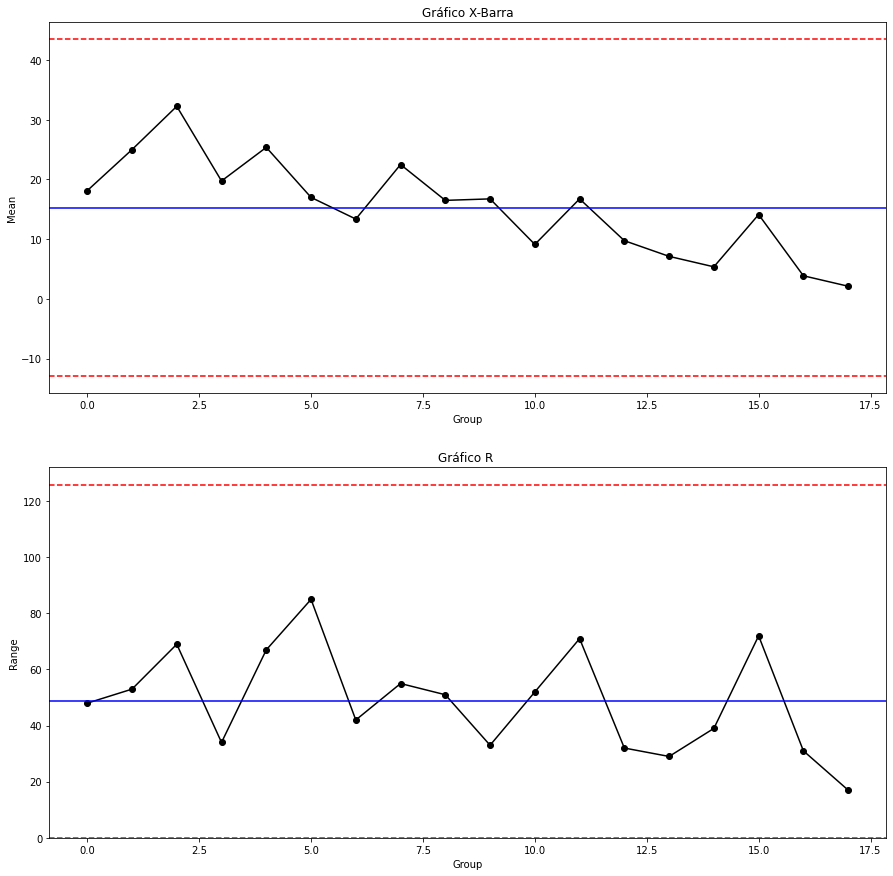

In [56]:

x = np.array(df_velocidade_linhas[['LINHA770','LINHA803','LINHA343','LINHA550','LINHA555','LINHA779','LINHA383',
                  'LINHA945']])

# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('Gráfico X-Barra')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.574*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('Gráfico R ')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.577*statistics.mean(r) or group < statistics.mean(x_bar)-0.577*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.574*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

   